# Heatmap

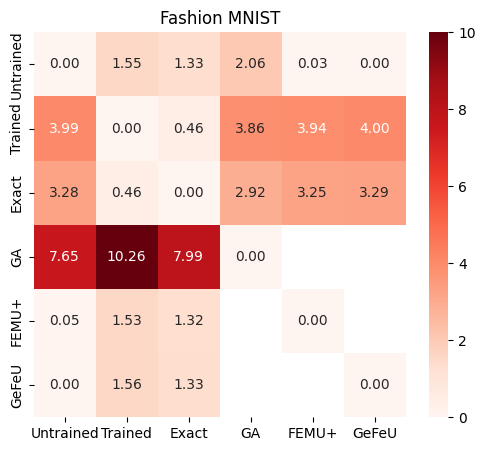

In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the KL-Divergence matrix with NaN for missing values
# mnist
data1 = np.array([
    [0, 1.43, 1.08, 2.19, 2.047, 2.063],
    [2.19, 0, 0.3, 2.25,  0.662, 0.596],
    [1.51, 0.28, 0, 1.35,  0.66, 0.639],
    [5.87, 9.77, 6.56, 0, np.nan, np.nan ],  # NaN for missing value
    [8.378, 2.392, 3.39,   np.nan, 0, np.nan],
    [8.399, 2.288, 3.344, np.nan, np.nan, 0],
])
# cmnsit
data2 = np.array([
    [0, 1.55,	1.33,	2.06, 0.0277, 0.0015],
    [3.99,	0,	0.46,	3.86, 3.9385, 4.0015],
    [3.28,	0.46,	0,	2.92, 3.2511, 3.2916],
    [7.65,	10.26,	7.99,	0, np.nan, np.nan],
    [0.049,1.533,1.3232, np.nan, 0, np.nan],
    [0.0015, 1.5619, 1.3333, np.nan, np.nan, 0],
])
# fmnist
data3 = np.array([
    [0,	1.4592,	1.0679,	2.2, 1.89, 1.81],
    [2.6349, 0,	0.6529,	2.05, 1.2, 1.29],
    [1.8268,0.6479,	0,	0.84, 0.71, 0.72],
    [6.46,	8.61,	3.8,	0, np.nan, np.nan],
    [8.21,	3.07,	2.85, np.nan, 0, np.nan],
    [7.9,	2.99,	2.64, np.nan, np.nan, 0],
])

# Define labels
labels = ["Untrained", "Trained", "Exact", "GA", "FEMU+", "GeFeU"]

# Create the heatmap
plt.figure(figsize=(6,5))
ax = sns.heatmap(data2, vmin=0,vmax=10, annot=True, fmt=".2f", cmap="Reds", xticklabels=labels, yticklabels=labels, mask=np.isnan(data))

# Add title
plt.title("Fashion MNIST")

# Show the heatmap
plt.show()


# Bar Loss

<Figure size 800x600 with 0 Axes>

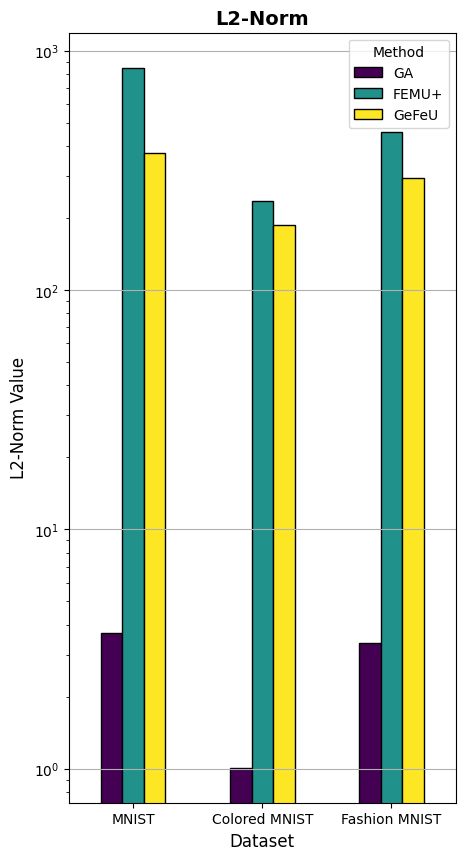

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
categories = ["Untrained", "Trained", "Exact"]
categories2 = ["MNIST", "Colored MNIST", "Fashion MNIST",]
methods = ["GA", "FEMU+", "GeFeU"]
#mnist
values = np.array([
    [27.90, 3.71, 28.62],   # GA
    [849.775, 850.416, 850.472],  # FEMU+
    [372.084, 372.863, 372.931]   # GeFeU
])
#cmnist
values2 = np.array([
[36.38,	1.01,	38.13],
[236.91,	235.33,	238.57],
[189.22,	186.84,	190.94],
])

#fmnist
values3 = np.array([
[28.17,	3.36,	29.22],
[459.48,	459.5,	460.48],
[295.31,	295.25,	296.45],
])

# take only the 2nd values for each of the values arrays and combined them
values_combined = np.array([values[:,1], values2[:,1], values3[:,1], ]).T

# Convert data to a Pandas DataFrame
df = pd.DataFrame(values_combined, index=methods, columns=categories2)

# Plot settings
plt.figure(figsize=(8, 6))
df.T.plot(kind="bar", colormap="viridis", edgecolor="black", figsize=(5,10))

# Labels & Title
plt.title("L2-Norm", fontsize=14, fontweight="bold")
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("L2-Norm Value", fontsize=12)
plt.yscale("log")
plt.xticks(rotation=0)
plt.legend(title="Method")
plt.grid(True, axis="y")
# Show plot
plt.show()

# Bars Layer wise

C:\Users\Moritz\AppData\Local\Temp\ipykernel_8468\3280701280.py:72: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1000000)


<Figure size 1500x2000 with 0 Axes>

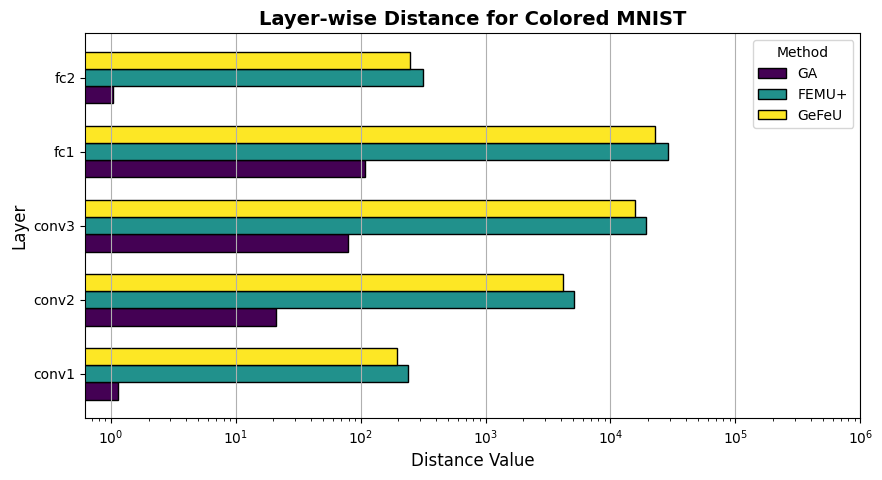

In [126]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
layers = ["fc1.weights", "fc1.bias", "fc2.weights", "fc2.bias"]
methods = ["GA", "FEMU+", "GeFeU"]
# GA    FEMU+    GeFeU
#mnist
values = np.array([
    [1551.07,    442315.14, 157053.23],        
    [5.54,       754.5, 354.186],   
    [38.13,      3486.68, 2155.758],
    [0.05,       6.69, 5.555],
])
# fmnist
# values = np.array([
#     [1890.64, 229736.24, 574.84 ],
#     [3.87, 372.16, 253.44],
#     [23.6, 2634.54, 1998.73],
#     [0.037, 25.06, 18.38], 
# ])

if True:
    layers = ["conv1.weights",
        "conv1.biases",
        "conv2.weights",
        "conv2.biases",
        "conv3.weights",
        "conv3.biases",
        "fc1.weights",
        "fc1.bias",
        "fc2.weigths",
        "fc2.bias",
        ]
    values = np.array([
        [1.11, 229.31, 188.33],
        [0.04,8.64,7.04,],
        [21.08,5113.28,4120.75,],
        [0.08, 18.64,14.95,],
        [79.56,19352.44,15557.75,],
        [0.14,46.62,34.71,],
        [107.82,28955.56,  22786.43,],
        [0.11,39.25,26.01,],
        [0.92,311.77,247.01,],
        [0.12,1.2,0.89,],
    ])

# add every 2 row in the np.array values together
new_values = values[::2] + values[1::2]
values = new_values
# remove every 2 entry in the  layers list
layers = layers[::2]
layers = [l.split(".")[0] for l in layers]

# Convert data to a Pandas DataFrame
df = pd.DataFrame(values, index=layers, columns=methods)

# Plot settings
plt.figure(figsize=(15, 20))

df.plot(kind="barh", colormap="viridis", edgecolor="black", width=0.7, figsize=(10, 5))  # Horizontal bars, closer together

# Labels & Title
plt.title("Layer-wise Distance for Colored MNIST", fontsize=14, fontweight="bold")
plt.ylabel("Layer", fontsize=12)
plt.xlabel("Distance Value", fontsize=12)
plt.legend(title="Method")

plt.xscale("log")
plt.xlim(0, 1000000)
plt.grid(True, axis="x")
# Show plot
plt.show()


# Normal Distributions

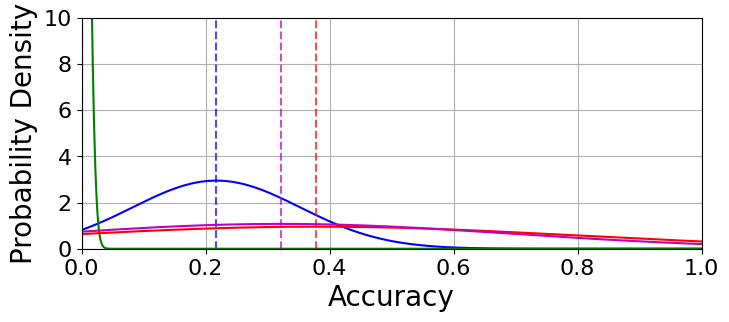

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# for mnist
# all
# Exact     GA    FEMU+    GeFeU
values11 = np.array([
    [0.8539, 0.2179, 0.8404, 0.8570],
    [0.0024, 0.0685, 0.0265, 0.0186],
])
# Mean
# Variance
# retain of class
values12 = np.array([
    [0.7923, 0.0, 0.7410, 0.7664],
    [0.0078, 0.0001, 0.1306, 0.0533],
])
# forget of class
values13 = np.array([
    [0.6401, 0.0, 0.7068, 0.7333],
    [0.0121, 0.0001, 0.1081, 0.0647],
])

# for cmnist
# Exact     GA    FEMU+    GeFeU
values21 = np.array([
    [0.9176, 0.2239, 0.1150, 0.0954],
    [0.0061, 0.1144, 0.0655, 0.0069],
])
# Mean
# Variance
# retain of class
values22 = np.array([
    [0.9315, 0.0, 0.9908, 0.0333],
    [0.0134, 0.0001, 0.0494, 0.1795],
])
# forget of class
values23 = np.array([
    [0.3546, 0.0, 0.9785, 0.0333],
    [0.0429, 0.0001, 0.1158, 0.1795],
])

# for fmnist
# Exact     GA    FEMU+    GeFeU
values31 = np.array([
    [0.7730, 0.1931, 0.5235, 0.5550],
    [0.0014, 0.0173, 0.0969, 0.0878],
])
# Mean
# Variance
# retain of class
values32 = np.array([
    [0.7769,    0.0, 0.8104, 0.7606],
    [0.0069,    0.0001, 0.0556, 0.0753],
])
# forget of class
values33 = np.array([
    [0.2173,    0.0, 0.3777, 0.3214],
    [0.0183,    0.0001, 0.1746, 0.1379],
])

# Create an x range for plotting
x = np.linspace(0, 1, 1000)

# Create a new figure
plt.figure(figsize=(8, 3))


v = values33
means, std_devs = v[0], np.sqrt(v[1])
# Define the names of the distributions
distribution_names = ["Retrained", "Gradient Ascent", "FEMU+", "GeFeU"]
colors = ['b', 'g', 'r', 'm']  # Different colors for each distribution

# Plot each normal distribution with a label
for mean, std_dev, name, color in zip(means, std_devs, distribution_names, colors):
    if std_dev > 0:  # Avoid division by zero for zero variance
        y = norm.pdf(x, mean, std_dev)
        plt.axvline(mean, color=color, linestyle="dashed", alpha=0.7)
        plt.plot(x, y, label=name, color=color)

# Adding labels, title, and legend
# plt.title('Normal Distributions with of ')
plt.xlabel('Accuracy', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.xlim(0, 1)
plt.xticks(size=16)
plt.ylim(0, 10)
plt.yticks(size=16)
plt.grid(True)
# plt.legend()

# Display the plot
plt.show()

# Loss Changes

In [150]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
categories = ["All", "Retain", "Forget"]
# for each dataset one plot
# categories = ["MNIST", "Colored MNIST", "Fashion MNIST",]
methods = ["GA", "FEMU+", "GeFeU", "Exact"]
#mnist
values1 = np.array([
    [0.5313, 0.3431, 2.4288],   # GA
    [0.1657, 0.1407, 0.4219],  # FEMU+
    [0.1092, 0.0909, 0.2963],   # GeFeU
    [0.0776, 0.0735, 0.1214],   # Exact
])
trained1 = np.array([ 0.0717, 0.0736, 0.0531,])

#cmnist
values2 = np.array([
[0.9543,	0.9094,	4.3493],
[0.2845,	0.2845,	0.2988],
[0.2878,	 0.2879,	0.3010],
[0.0358, 0.0317, 0.3568],
])
trained2 = np.array([ 0.0336, 0.0318, 0.1744,])

# Does not exist
# #fmnist
# values3 = np.array([
# [28.17,	    3.36,	29.22],
# [459.48,	459.5,	460.48],
# [295.31,	295.25,	296.45],
# ])
# trained3 = np.array([ , , ,])

for i in range(0, len(values1)):
    values1[i] = values1[i] - trained1
    values2[i] = values2[i] - trained2
    # values3[i] = values3[i] - trained3


cat1 = np.stack([values1[:,0], values2[:,0]], axis=1)
cat2 = np.stack([values1[:,1], values2[:,1]], axis=1)
cat3 = np.stack([values1[:,2], values2[:,2]], axis=1)
cat1

array([[0.4596, 0.9207],
       [0.094 , 0.2509],
       [0.0375, 0.2542],
       [0.0059, 0.0022]])

<Figure size 800x600 with 0 Axes>

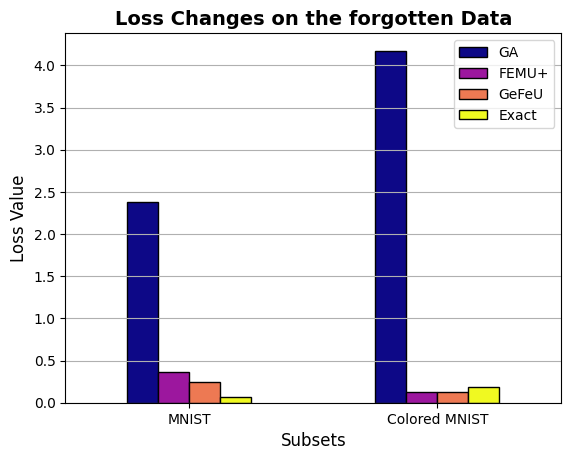

In [158]:

# Convert data to a Pandas DataFrame
df = pd.DataFrame(cat3, index=methods, columns=["MNIST", "Colored MNIST"])

# Plot settings
plt.figure(figsize=(8, 6))
df.T.plot(kind="bar", colormap="plasma", edgecolor="black")

# Labels & Title
plt.title("Loss Changes on the forgotten Data", fontsize=14, fontweight="bold")
plt.xlabel("Subsets", fontsize=12)
plt.ylabel("Loss Value", fontsize=12)
plt.xticks(rotation=0)
# plt.legend(title="Method")
plt.grid(True, axis="y")
# Show plot
plt.show()

___

In [5]:
(0.7664+0.7333)/2

0.7498499999999999

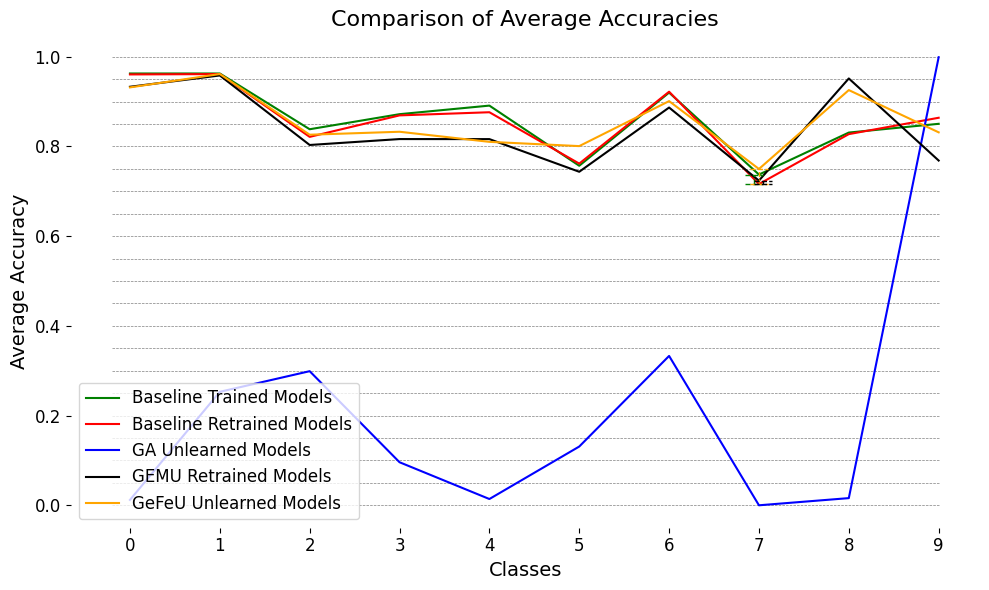

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
data1 = [0.9606,0.9614,0.8214,0.8693,0.8763,0.7618,0.9221,0.7162,0.8275,0.8640] # Baseline Exact MU Models
data4 = [0.9627,0.9627,0.8384,0.8720,0.8911,0.7570,0.9201,0.73735,0.8310,0.8505] # Baseline Trained Models
data3 = [0.012, 0.253, 0.299, 0.096, 0.014, 0.131, 0.333, 0,      0.016 ,0.999] # GA MU Models
data5 = [0.9331,0.9583,0.8033,0.8165,0.8164,0.7436,0.8868,0.7239 , 0.9516,0.7686] # GEMU MU Models
data2 = [0.9317,0.9615,0.8262,0.8328,0.8103,0.8008,0.9011,0.74985,0.9257,0.8315] # Gefeu MU Models
x_axes = range(10)

# Create the plot
plt.figure(figsize=(10, 6))
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['legend.loc'] = 'lower left'

s = 0.
l_x = [-0.2]
l_x.extend(x_axes)
while True:
    plt.plot(l_x, [s] * len(l_x), color="grey", linestyle="--", linewidth=0.5)
    s += 0.05
    if s > 1.01:
        break

plt.plot(x_axes, data4, color="green", label="Baseline Trained Models")
plt.plot(x_axes, data1, color="red",   label="Baseline Retrained Models")
plt.plot(x_axes, data3, color="blue", label="GA Unlearned Models")
plt.plot(x_axes, data5, color="black", label="GEMU Retrained Models")
plt.plot(x_axes, data2, color="orange", label="GeFeU Unlearned Models")

z = zip(x_axes, data1, data4, data2, data5)
for x, y1, y2, y3, y4 in z:
    if x == 7:
        x = x - 0.05
        plt.plot([x, x], [y1, y2], color="green", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y1, y1], color="green", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y2, y2], color="green", linestyle="--", linewidth=1)

        x = x + 0.05
        plt.plot([x, x], [y1, y3], color="orange", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y1, y1], color="orange", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y3, y3], color="orange", linestyle="--", linewidth=1)

        x = x + 0.05
        plt.plot([x, x], [y1, y4], color="black", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y1, y1], color="black", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y4, y4], color="black", linestyle="--", linewidth=1)

# Add labels and legend
plt.title("Comparison of Average Accuracies", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.xticks(x_axes, size=12)
# plt.xticks(rotation=30)
plt.ylabel("Average Accuracy", fontsize=14)
plt.yticks(size=12)
plt.ylim(-0.05, 1.05)
plt.legend(fontsize=12,)

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
ex = data1
train = data4
ga = data3
gefeu= data2
gemu = data5

In [8]:
sum([abs(x-y) for x, y in zip(ex, ga)])/10

0.6697599999999999

In [9]:
import torch

og_labels = {
    1: torch.Tensor([1,0]),
    2: torch.Tensor([0,1]),
    3: torch.Tensor([1,0]),
    4: torch.Tensor([0,1]),
    5: torch.Tensor([1,0]),
    6: torch.Tensor([0,1]),
    7: torch.Tensor([1,1]),
    8: torch.Tensor([0,1]),
    9: torch.Tensor([1,1]),
}

In [10]:
cls_labels = torch.stack(list(og_labels.values()))
cls_mean = torch.mean(cls_labels, dim=0)
cls_index = torch.argmax(cls_mean)
cls_label = torch.zeros_like(cls_mean)
cls_label[cls_index] = 1

In [11]:
cls_label

tensor([0., 1.])

In [12]:
# Now, make a batch of 100 

batch_size = 100
batch = torch.stack([cls_label for _ in range(batch_size)])

In [13]:
batch.shape

torch.Size([100, 2])

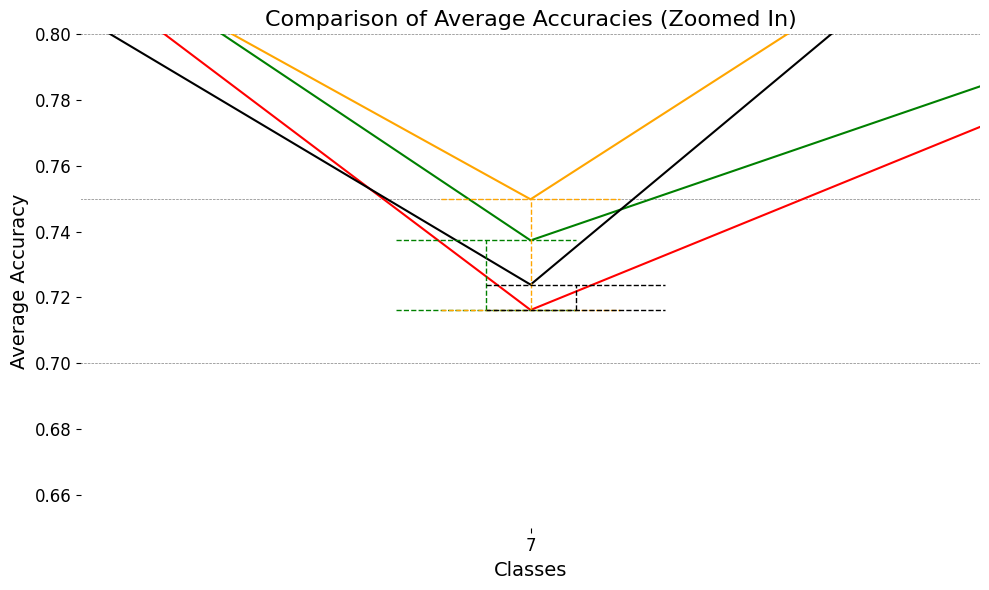

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
data1 = [0.9606,0.9614,0.8214,0.8693,0.8763,0.7618,0.9221,0.7162,0.8275,0.8640] # Baseline Exact MU Models
data4 = [0.9627,0.9627,0.8384,0.8720,0.8911,0.7570,0.9201,0.73735,0.8310,0.8505] # Baseline Trained Models
data3 = [0.012, 0.253, 0.299, 0.096, 0.014, 0.131, 0.333, 0,      0.016 ,0.999] # GA MU Models
data5 = [0.9331,0.9583,0.8033,0.8165,0.8164,0.7436,0.8868,0.7239 , 0.9516,0.7686] # GEMU MU Models
data2 = [0.9317,0.9615,0.8262,0.8328,0.8103,0.8008,0.9011,0.74985,0.9257,0.8315] # Gefeu MU Models
x_axes = range(10)

# Create the plot
plt.figure(figsize=(10, 6))
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['legend.loc'] = 'lower left'

s = 0.
l_x = [-0.2]
l_x.extend(x_axes)
while True:
    plt.plot(l_x, [s] * len(l_x), color="grey", linestyle="--", linewidth=0.5)
    s += 0.05
    if s > 1.01:
        break

plt.plot(x_axes, data4, color="green", label="Baseline Trained Models")
plt.plot(x_axes, data1, color="red",   label="Baseline Retrained Models")
plt.plot(x_axes, data3, color="blue", label="GA Unlearned Models")
plt.plot(x_axes, data5, color="black", label="GEMU Retrained Models")
plt.plot(x_axes, data2, color="orange", label="GeFeU Unlearned Models")

z = zip(x_axes, data1, data4, data2, data5)
for x, y1, y2, y3, y4 in z:
    if x == 7:
        x = x - 0.05
        plt.plot([x, x], [y1, y2], color="green", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y1, y1], color="green", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y2, y2], color="green", linestyle="--", linewidth=1)

        x = x + 0.05
        plt.plot([x, x], [y1, y3], color="orange", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y1, y1], color="orange", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y3, y3], color="orange", linestyle="--", linewidth=1)

        x = x + 0.05
        plt.plot([x, x], [y1, y4], color="black", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y1, y1], color="black", linestyle="--", linewidth=1)
        plt.plot([x-0.1, x+0.1], [y4, y4], color="black", linestyle="--", linewidth=1)

# Add labels and legend
plt.title("Comparison of Average Accuracies (Zoomed In)", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.xticks(x_axes, size=12)
plt.ylabel("Average Accuracy", fontsize=14)
plt.yticks(size=12)

# Set zoomed-in section
plt.xlim(6.5, 7.5)
plt.ylim(0.65, 0.8)

# Show the plot
plt.tight_layout()
plt.show()
